In [5]:
%matplotlib notebook
from tqdm import tqdm
%matplotlib inline
#Module to handle regular expressions
import re
#manage files
import os
#Library for emoji
import emoji
#Import pandas and numpy to handle data
import pandas as pd
import numpy as np

#import libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from PIL import Image

#Import nltk to check english lexicon
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import (
    wordnet,
    stopwords
)

import sklearn
from sklearn.preprocessing import Normalizer
from sklearn.feature_extraction.text import (
    CountVectorizer,
    TfidfVectorizer
)
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from pycorenlp import StanfordCoreNLP
from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string

from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF

In [6]:
tweets = pd.read_csv("scraped_tweets.csv")

In [7]:
tweets

,Unnamed: 0,date,username,description,location,following,followers,totaltweets,retweetcount,text,hashtags
0,0,2021-07-19 23:59:59,ImmuneTruth,No valore mis escritos por el número de seguid...,NaN,402,98,5296,5749,I stand with the people of Cuba. They deserve ...,[]
1,1,2021-07-19 23:59:58,ComradeMomanga,#BlackLivesMatter Comrade/He/Him. Staunchly ag...,NaN,552,521,9752,0,@POTUS Consulting with a feudal society and sa...,[]
2,2,2021-07-19 23:59:56,OneFish38862555,Politics are stupid. Ignoring politics is stup...,NaN,107,2,57,685,Across its major cities and especially in Hava...,['Cuba']
3,3,2021-07-19 23:59:55,vikingonica,"Por una Nicaragua libre¡¡ Católico, barcelonis...","Toronto, Ontario",1326,1035,6893,606,🚨#SOSCuba🇨🇺\n\nFREEDOM!\n\nDOWN WITH THE DICTA...,"['SOSCuba', 'Cuba']"
4,4,2021-07-19 23:59:54,AshleyDa40,"Honorably RET,.,hunt, fish,build",United States,1371,1550,70497,190,Don't miss this story \n\nCuban exiles warn: U...,['TheSaraCarterShow']
...,...,...,...,...,...,...,...,...,...,...,...
3995,3995,2021-07-19 23:01:32,brianboyar,DUB edition REMIX,"Fair Oaks Ranch, TX",662,239,8122,0,Biden is pretending to have dementia and they’...,[]
3996,3996,2021-07-19 23:01:32,BenTylerFL,NaN,"Miami, FL",2424,365,891,52,"At ⁦@POTUS⁩ @JoeBiden’s direction, the United ...",[]
3997,3997,2021-07-19 23:01:31,lb_tharealist,"Amature Rapsinger, Philosopher & Political Com...","San Diego, CA",713,573,3077,0,New videos uploading to YouTube now...\n💯 💙✌🏽⭐...,"['MedicareForAll', 'MPP', 'Cuba']"
3998,3998,2021-07-19 23:01:30,Martin_Humberto,ML\nAtheist\nhe/him,"Minneapolis, MN",91,24,508,0,#Leftists need to make lifting the #embargo ag...,"['Leftists', 'embargo', 'Cuba', 'Biden', 'Obama']"


In [8]:
#preprocess text in tweets by removing links, @UserNames, blank spaces, etc.
def preprocessing_text(tweets):
    #put everythin in lowercase
    tweets['text'] = tweets['text'].str.lower()
    #Replace rt indicating that was a retweet
    tweets['text'] = tweets['text'].str.replace('rt', '')
    #Replace occurences of mentioning @UserNames
    tweets['text'] = tweets['text'].replace(r'@\w+', '', regex=True)
    #Replace links contained in the tweet
    tweets['text'] = tweets['text'].replace(r'http\S+', '', regex=True)
    tweets['text'] = tweets['text'].replace(r'www.[^ ]+', '', regex=True)
    #remove numbers
    tweets['text'] = tweets['text'].replace(r'[0-9]+', '', regex=True)
    #replace special characters and puntuation marks
    tweets['text'] = tweets['text'].replace(r'[!"#$%&()*+,-./:;<=>?@[\]^_`{|}~]', '', regex=True)
    return tweets

In [9]:
tweets = preprocessing_text(tweets)

In [10]:
tweets

,Unnamed: 0,date,username,description,location,following,followers,totaltweets,retweetcount,text,hashtags
0,0,2021-07-19 23:59:59,ImmuneTruth,No valore mis escritos por el número de seguid...,NaN,402,98,5296,5749,i stand with the people of cuba they deserve f...,[]
1,1,2021-07-19 23:59:58,ComradeMomanga,#BlackLivesMatter Comrade/He/Him. Staunchly ag...,NaN,552,521,9752,0,consulting with a feudal society and saying w...,[]
2,2,2021-07-19 23:59:56,OneFish38862555,Politics are stupid. Ignoring politics is stup...,NaN,107,2,57,685,across its major cities and especially in hava...,['Cuba']
3,3,2021-07-19 23:59:55,vikingonica,"Por una Nicaragua libre¡¡ Católico, barcelonis...","Toronto, Ontario",1326,1035,6893,606,🚨soscuba🇨🇺\n\nfreedom\n\ndown with the dictato...,"['SOSCuba', 'Cuba']"
4,4,2021-07-19 23:59:54,AshleyDa40,"Honorably RET,.,hunt, fish,build",United States,1371,1550,70497,190,don't miss this story \n\ncuban exiles warn us...,['TheSaraCarterShow']
...,...,...,...,...,...,...,...,...,...,...,...
3995,3995,2021-07-19 23:01:32,brianboyar,DUB edition REMIX,"Fair Oaks Ranch, TX",662,239,8122,0,biden is pretending to have dementia and they’...,[]
3996,3996,2021-07-19 23:01:32,BenTylerFL,NaN,"Miami, FL",2424,365,891,52,at ⁦⁩ ’s direction the united states is active...,[]
3997,3997,2021-07-19 23:01:31,lb_tharealist,"Amature Rapsinger, Philosopher & Political Com...","San Diego, CA",713,573,3077,0,new videos uploading to youtube now\n💯 💙✌🏽⭐ 💯\...,"['MedicareForAll', 'MPP', 'Cuba']"
3998,3998,2021-07-19 23:01:30,Martin_Humberto,ML\nAtheist\nhe/him,"Minneapolis, MN",91,24,508,0,leftists need to make lifting the embargo agai...,"['Leftists', 'embargo', 'Cuba', 'Biden', 'Obama']"


In [11]:
def stop_words(tweets):
    #We need to remove the stop words
    stop_words_list = (stopwords.words('english'), 'cuba', 'Cuba')
    tweets['text'] = tweets['text'].str.lower()
    tweets['text'] = tweets['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words_list)]))
    return tweets

In [12]:
tweets = stop_words(tweets)

In [13]:
tweets

,Unnamed: 0,date,username,description,location,following,followers,totaltweets,retweetcount,text,hashtags
0,0,2021-07-19 23:59:59,ImmuneTruth,No valore mis escritos por el número de seguid...,NaN,402,98,5296,5749,i stand with the people of they deserve freedom,[]
1,1,2021-07-19 23:59:58,ComradeMomanga,#BlackLivesMatter Comrade/He/Him. Staunchly ag...,NaN,552,521,9752,0,consulting with a feudal society and saying wh...,[]
2,2,2021-07-19 23:59:56,OneFish38862555,Politics are stupid. Ignoring politics is stup...,NaN,107,2,57,685,across its major cities and especially in hava...,['Cuba']
3,3,2021-07-19 23:59:55,vikingonica,"Por una Nicaragua libre¡¡ Católico, barcelonis...","Toronto, Ontario",1326,1035,6893,606,🚨soscuba🇨🇺 freedom down with the dictatorship ...,"['SOSCuba', 'Cuba']"
4,4,2021-07-19 23:59:54,AshleyDa40,"Honorably RET,.,hunt, fish,build",United States,1371,1550,70497,190,don't miss this story cuban exiles warn us lef...,['TheSaraCarterShow']
...,...,...,...,...,...,...,...,...,...,...,...
3995,3995,2021-07-19 23:01:32,brianboyar,DUB edition REMIX,"Fair Oaks Ranch, TX",662,239,8122,0,biden is pretending to have dementia and they’...,[]
3996,3996,2021-07-19 23:01:32,BenTylerFL,NaN,"Miami, FL",2424,365,891,52,at ⁦⁩ ’s direction the united states is active...,[]
3997,3997,2021-07-19 23:01:31,lb_tharealist,"Amature Rapsinger, Philosopher & Political Com...","San Diego, CA",713,573,3077,0,new videos uploading to youtube now 💯 💙✌🏽⭐ 💯 m...,"['MedicareForAll', 'MPP', 'Cuba']"
3998,3998,2021-07-19 23:01:30,Martin_Humberto,ML\nAtheist\nhe/him,"Minneapolis, MN",91,24,508,0,leftists need to make lifting the embargo agai...,"['Leftists', 'embargo', 'Cuba', 'Biden', 'Obama']"


In [14]:
#Replace elongated words by identifying those repeated characters and then remove them and compare the new word with the english lexicon
def in_dict(word):
    if wordnet.synsets(word):
        #if the word is in the dictionary, we'll return True
        return True

def replace_elongated_word(word):
    regex = r'(\w*)(\w+)\2(\w*)'
    repl = r'\1\2\3'    
    if in_dict(word):
        return word
    new_word = re.sub(regex, repl, word)
    if new_word != word:
        return replace_elongated_word(new_word)
    else:
        return new_word

def detect_elongated_words(row):
    regexrep = r'(\w*)(\w+)(\2)(\w*)'
    words = [''.join(i) for i in re.findall(regexrep, row)]
    for word in words:
        if not in_dict(word):
            row = re.sub(word, replace_elongated_word(word), row)
    return row

In [15]:
tweets['text'] = tweets['text'].apply(lambda x: detect_elongated_words(x))

In [16]:
tweets

,Unnamed: 0,date,username,description,location,following,followers,totaltweets,retweetcount,text,hashtags
0,0,2021-07-19 23:59:59,ImmuneTruth,No valore mis escritos por el número de seguid...,NaN,402,98,5296,5749,i stand with the people of they deserve freedom,[]
1,1,2021-07-19 23:59:58,ComradeMomanga,#BlackLivesMatter Comrade/He/Him. Staunchly ag...,NaN,552,521,9752,0,consulting with a feudal society and saying wh...,[]
2,2,2021-07-19 23:59:56,OneFish38862555,Politics are stupid. Ignoring politics is stup...,NaN,107,2,57,685,across its major cities and especially in hava...,['Cuba']
3,3,2021-07-19 23:59:55,vikingonica,"Por una Nicaragua libre¡¡ Católico, barcelonis...","Toronto, Ontario",1326,1035,6893,606,🚨soscuba🇨🇺 freedom down with the dictatorship ...,"['SOSCuba', 'Cuba']"
4,4,2021-07-19 23:59:54,AshleyDa40,"Honorably RET,.,hunt, fish,build",United States,1371,1550,70497,190,don't miss this story cuban exiles warn us lef...,['TheSaraCarterShow']
...,...,...,...,...,...,...,...,...,...,...,...
3995,3995,2021-07-19 23:01:32,brianboyar,DUB edition REMIX,"Fair Oaks Ranch, TX",662,239,8122,0,biden is pretending to have dementia and they’...,[]
3996,3996,2021-07-19 23:01:32,BenTylerFL,NaN,"Miami, FL",2424,365,891,52,at ⁦⁩ ’s direction the united states is active...,[]
3997,3997,2021-07-19 23:01:31,lb_tharealist,"Amature Rapsinger, Philosopher & Political Com...","San Diego, CA",713,573,3077,0,new videos uploading to youtube now 💯 💙✌🏽⭐ 💯 m...,"['MedicareForAll', 'MPP', 'Cuba']"
3998,3998,2021-07-19 23:01:30,Martin_Humberto,ML\nAtheist\nhe/him,"Minneapolis, MN",91,24,508,0,leftists need to make lifting the embargo agai...,"['Leftists', 'embargo', 'Cuba', 'Biden', 'Obama']"


In [17]:
def replace_antonyms(word):
    #We get all the lemma for the word
    for syn in wordnet.synsets(word): 
        for lemma in syn.lemmas(): 
            #if the lemma is an antonyms of the word
            if lemma.antonyms(): 
                #we return the antonym
                return lemma.antonyms()[0].name()
    return word
            
def handling_negation(row):
    #Tokenize the row
    words = word_tokenize(row)
    speach_tags = ['JJ', 'JJR', 'JJS', 'NN', 'VB', 'VBD', 'VBG', 'VBN', 'VBP']
    #We obtain the type of words that we have in the text, we use the pos_tag function
    tags = nltk.pos_tag(words)
    #Now we ask if we found a negation in the words
    tags_2 = ''
    if "n't" in words and "not" in words:
        tags_2 = tags[min(words.index("n't"), words.index("not")):]
        words_2 = words[min(words.index("n't"), words.index("not")):]
        words = words[:(min(words.index("n't"), words.index("not")))+1]
    elif "n't" in words:
        tags_2 = tags[words.index("n't"):]
        words_2 = words[words.index("n't"):] 
        words = words[:words.index("n't")+1]
    elif "not" in words:
        tags_2 = tags[words.index("not"):]
        words_2 = words[words.index("not"):]
        words = words[:words.index("not")+1] 
        
    for index, word_tag in enumerate(tags_2):
        if word_tag[1] in speach_tags:
            words = words+[replace_antonyms(word_tag[0])]+words_2[index+2:]
            break
            
    return ' '.join(words)

In [18]:
tweets['text'] = tweets['text'].apply(lambda x: handling_negation(x))

In [19]:
tweets

,Unnamed: 0,date,username,description,location,following,followers,totaltweets,retweetcount,text,hashtags
0,0,2021-07-19 23:59:59,ImmuneTruth,No valore mis escritos por el número de seguid...,NaN,402,98,5296,5749,i stand with the people of they deserve freedom,[]
1,1,2021-07-19 23:59:58,ComradeMomanga,#BlackLivesMatter Comrade/He/Him. Staunchly ag...,NaN,552,521,9752,0,consulting with a feudal society and saying wh...,[]
2,2,2021-07-19 23:59:56,OneFish38862555,Politics are stupid. Ignoring politics is stup...,NaN,107,2,57,685,across its major cities and especially in hava...,['Cuba']
3,3,2021-07-19 23:59:55,vikingonica,"Por una Nicaragua libre¡¡ Católico, barcelonis...","Toronto, Ontario",1326,1035,6893,606,🚨soscuba🇨🇺 freedom down with the dictatorship ...,"['SOSCuba', 'Cuba']"
4,4,2021-07-19 23:59:54,AshleyDa40,"Honorably RET,.,hunt, fish,build",United States,1371,1550,70497,190,do n't attend story cuban exiles warn us lefti...,['TheSaraCarterShow']
...,...,...,...,...,...,...,...,...,...,...,...
3995,3995,2021-07-19 23:01:32,brianboyar,DUB edition REMIX,"Fair Oaks Ranch, TX",662,239,8122,0,biden is pretending to have dementia and they ...,[]
3996,3996,2021-07-19 23:01:32,BenTylerFL,NaN,"Miami, FL",2424,365,891,52,at ⁦⁩ ’ s direction the united states is activ...,[]
3997,3997,2021-07-19 23:01:31,lb_tharealist,"Amature Rapsinger, Philosopher & Political Com...","San Diego, CA",713,573,3077,0,new videos uploading to youtube now 💯 💙✌🏽⭐ 💯 m...,"['MedicareForAll', 'MPP', 'Cuba']"
3998,3998,2021-07-19 23:01:30,Martin_Humberto,ML\nAtheist\nhe/him,"Minneapolis, MN",91,24,508,0,leftists need to make lifting the embargo agai...,"['Leftists', 'embargo', 'Cuba', 'Biden', 'Obama']"


In [20]:
# Groupby by country
country = tweets.groupby("location")

In [21]:
country.describe().head()

Unnamed: 0                                      \
                                 count    mean std     min     25%     50%   
location                                                                     
\t32°56'3.45"N 97°4'41.04"W        1.0  2918.0 NaN  2918.0  2918.0  2918.0   
 Alabama U.S.                      1.0  3992.0 NaN  3992.0  3992.0  3992.0   
 Arkansas                          1.0  1283.0 NaN  1283.0  1283.0  1283.0   
 Divided States of Oblivia         1.0  3917.0 NaN  3917.0  3917.0  3917.0   
 FL                                1.0  2573.0 NaN  2573.0  2573.0  2573.0   

                                            following          ...  \
                                75%     max     count    mean  ...   
location                                                       ...   
\t32°56'3.45"N 97°4'41.04"W  2918.0  2918.0       1.0  3534.0  ...   
 Alabama U.S.                3992.0  3992.0       1.0  7615.0  ...   
 Arkansas                    1283.0  1283.0       1.0  1973.0  ...   
 Divided States of Oblivia   3917.0  3917.0       1.0  1272.0  ...   
 FL                          2573.0  2573.0       1.0    29.0  ...   

                            totaltweets           retweetcount              \
                                    75%       max        count    mean std   
location                                                                     
\t32°56'3.45"N 97°4'41.04"W     40390.0   40390.0          1.0  1144.0 NaN   
 Alabama U.S.                  520971.0  520971.0          1.0    12.0 NaN   
 Arkansas                      118203.0  118203.0          1.0  1884.0 NaN   
 Divided States of Oblivia      81889.0   81889.0          1.0     0.0 NaN   
 FL                              5837.0    5837.0          1.0   330.0 NaN   

                                                                     
                                min     25%     50%     75%     max  
location                                                             
\t32°56'3.45"N 97°4'41.04"W  1144.0  1144.0  1144.0  1144.0  1144.0  
 Alabama U.S.                  12.0    12.0    12.0    12.0    12.0  
 Arkansas                    1884.0  1884.0  1884.0  1884.0  1884.0  
 Divided States of Oblivia      0.0     0.0     0.0     0.0     0.0  
 FL                           330.0   330.0   330.0   330.0   330.0  

[5 rows x 40 columns]

In [22]:
def cleaning_table(tweets):
    #This function will process all the required cleaning for the text in our tweets
    tweets = preprocessing_text(tweets)
    tweets['text'] = tweets['text'].apply(lambda x: detect_elongated_words(x))
    tweets['text'] = tweets['text'].apply(lambda x: handling_negation(x))
    tweets = stop_words(tweets)
    return tweets

In [23]:
#Vectorization for Data Visualization
def vectorization(tweets):
    #CountVectorizer will convert a collection of text documents to a matrix of token counts
    #Produces a sparse representation of the counts 
    #Initialize
    vector = CountVectorizer()
    #We fit and transform the vector created
    frequency_matrix = vector.fit_transform(tweets.text)
    #Sum all the frequencies for each word
    sum_frequencies = np.sum(frequency_matrix, axis=0)
    #Now we use squeeze to remove single-dimensional entries from the shape of an array that we got from applying np.asarray to
    #the sum of frequencies.
    frequency = np.squeeze(np.asarray(sum_frequencies))
    #Now we get into a dataframe all the frequencies and the words that they correspond to
    frequency_df = pd.DataFrame([frequency], columns=vector.get_feature_names()).transpose()
    return frequency_df

In [24]:
vectorization(tweets) #why are there so many non-english words??

,0
aa,1
abajoladictadura,37
abajoladictaduracomunista,1
abandon,1
abandoned,3
...,...
zuncito,3
zurdas,1
ángeles,1
ángelo,1


In [25]:
def word_cloud(text):
    
    #We get the directory that we are working on
    file = os.getcwd()
    #We read the mask image into a numpy array
    cuba_mask = np.array(Image.open(os.path.join(file, "cubacloud.png")))
    #Now we store the tweets into a series to be able to process 
    #tweets_list = pd.Series([t for t in tweet_table.tweet]).str.cat(sep=' ')  
    #We generate the wordcloud using the series created and the mask 
    word_cloud = WordCloud(width=2000, height=1000, max_font_size=200, background_color="black", max_words=2000, mask=cuba_mask, contour_width=1, 
                           contour_color="steelblue", colormap="nipy_spectral", stopwords=["cuba"])
    word_cloud.generate(tweets)
    
    #wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(tweets_list)
    
    #Now we plot both figures, the wordcloud and the mask
    #plt.figure(figsize=(15,15))
    plt.figure(figsize=(10,10))
    plt.imshow(word_cloud, interpolation="hermite")
    plt.axis("off")
    #plt.imshow(avengers_mask, cmap=plt.cm.gray, interpolation="bilinear")
    #plt.axis("off")    
    plt.show()

In [25]:
def graph(word_frequency, sent):
    labels = word_frequency[0][1:51].index
    title = "Word Frequency for %s" %sent
    #Plot the figures
    plt.figure(figsize=(10,5))
    plt.bar(np.arange(50), word_frequency[0][1:51], width = 0.8, color = sns.color_palette("bwr"), alpha=0.5, 
            edgecolor = "black", capsize=8, linewidth=1);
    plt.xticks(np.arange(50), labels, rotation=90, size=14);
    plt.xlabel("50 more frequent words", size=14);
    plt.ylabel("Frequency", size=14);
    #plt.title('Word Frequency for %s', size=18) %sent;
    plt.title(title, size=18)
    plt.grid(False);
    plt.gca().spines["top"].set_visible(False);
    plt.gca().spines["right"].set_visible(False);
    plt.show()

In [26]:
def regression_graph(table):
    table = table[1:]
    #We set the style of seaborn
    sns.set_style("whitegrid")   
    #Initialize the figure
    plt.figure(figsize=(6,6))
    
    #we obtain the points from matplotlib scatter
    points = plt.scatter(table["Positive"], table["Negative"], c=table["Positive"], s=75, cmap="bwr")
    #graph the colorbar
    plt.colorbar(points)
    #we graph the regplot from seaborn
    sns.regplot(x="Positive", y="Negative",fit_reg=False, scatter=False, color=".1", data=table)
    plt.xlabel("Frequency for Positive Tweets", size=14)
    plt.ylabel("Frequency for Negative Tweets", size=14)
    plt.title("Word frequency in Positive vs. Negative Tweets", size=14)
    plt.grid(False)
    sns.despine()

In [26]:
if __name__ == "__main__":
    tweet_table = cleaning_table(tweets)

In [27]:
tweet_table

,Unnamed: 0,date,username,description,location,following,followers,totaltweets,retweetcount,text,hashtags
0,0,2021-07-19 23:59:59,ImmuneTruth,No valore mis escritos por el número de seguid...,NaN,402,98,5296,5749,i stand with the people of they deserve freedom,[]
1,1,2021-07-19 23:59:58,ComradeMomanga,#BlackLivesMatter Comrade/He/Him. Staunchly ag...,NaN,552,521,9752,0,consulting with a feudal society and saying wh...,[]
2,2,2021-07-19 23:59:56,OneFish38862555,Politics are stupid. Ignoring politics is stup...,NaN,107,2,57,685,across its major cities and especially in hava...,['Cuba']
3,3,2021-07-19 23:59:55,vikingonica,"Por una Nicaragua libre¡¡ Católico, barcelonis...","Toronto, Ontario",1326,1035,6893,606,🚨soscuba🇨🇺 freedom down with the dictatorship ...,"['SOSCuba', 'Cuba']"
4,4,2021-07-19 23:59:54,AshleyDa40,"Honorably RET,.,hunt, fish,build",United States,1371,1550,70497,190,do n't miss cuban exiles warn us leftists thre...,['TheSaraCarterShow']
...,...,...,...,...,...,...,...,...,...,...,...
3995,3995,2021-07-19 23:01:32,brianboyar,DUB edition REMIX,"Fair Oaks Ranch, TX",662,239,8122,0,biden is pretending to have dementia and they ...,[]
3996,3996,2021-07-19 23:01:32,BenTylerFL,NaN,"Miami, FL",2424,365,891,52,at ⁦⁩ ’ s direction the united states is activ...,[]
3997,3997,2021-07-19 23:01:31,lb_tharealist,"Amature Rapsinger, Philosopher & Political Com...","San Diego, CA",713,573,3077,0,new videos uploading to youtube now 💯 💙✌🏽⭐ 💯 m...,"['MedicareForAll', 'MPP', 'Cuba']"
3998,3998,2021-07-19 23:01:30,Martin_Humberto,ML\nAtheist\nhe/him,"Minneapolis, MN",91,24,508,0,leftists need to make lifting the embargo agai...,"['Leftists', 'embargo', 'Cuba', 'Biden', 'Obama']"


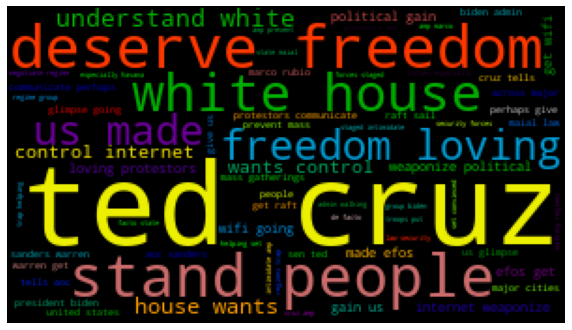

In [58]:
if __name__ == "__main__":    
    #First we draw a word cloud
    #For All tweets
    word_cloud(pd.Series([t for t in tweet_table.text]).str.cat(sep=' '))    

In [28]:
from bertopic import BERTopic

In [29]:
tweet_table.drop_duplicates(inplace=True)

In [30]:
tweet_table.reset_index(drop=True, inplace=True)

In [31]:
tweets

,Unnamed: 0,date,username,description,location,following,followers,totaltweets,retweetcount,text,hashtags
0,0,2021-07-19 23:59:59,ImmuneTruth,No valore mis escritos por el número de seguid...,NaN,402,98,5296,5749,i stand with the people of they deserve freedom,[]
1,1,2021-07-19 23:59:58,ComradeMomanga,#BlackLivesMatter Comrade/He/Him. Staunchly ag...,NaN,552,521,9752,0,consulting with a feudal society and saying wh...,[]
2,2,2021-07-19 23:59:56,OneFish38862555,Politics are stupid. Ignoring politics is stup...,NaN,107,2,57,685,across its major cities and especially in hava...,['Cuba']
3,3,2021-07-19 23:59:55,vikingonica,"Por una Nicaragua libre¡¡ Católico, barcelonis...","Toronto, Ontario",1326,1035,6893,606,🚨soscuba🇨🇺 freedom down with the dictatorship ...,"['SOSCuba', 'Cuba']"
4,4,2021-07-19 23:59:54,AshleyDa40,"Honorably RET,.,hunt, fish,build",United States,1371,1550,70497,190,do n't miss cuban exiles warn us leftists thre...,['TheSaraCarterShow']
...,...,...,...,...,...,...,...,...,...,...,...
3995,3995,2021-07-19 23:01:32,brianboyar,DUB edition REMIX,"Fair Oaks Ranch, TX",662,239,8122,0,biden is pretending to have dementia and they ...,[]
3996,3996,2021-07-19 23:01:32,BenTylerFL,NaN,"Miami, FL",2424,365,891,52,at ⁦⁩ ’ s direction the united states is activ...,[]
3997,3997,2021-07-19 23:01:31,lb_tharealist,"Amature Rapsinger, Philosopher & Political Com...","San Diego, CA",713,573,3077,0,new videos uploading to youtube now 💯 💙✌🏽⭐ 💯 m...,"['MedicareForAll', 'MPP', 'Cuba']"
3998,3998,2021-07-19 23:01:30,Martin_Humberto,ML\nAtheist\nhe/him,"Minneapolis, MN",91,24,508,0,leftists need to make lifting the embargo agai...,"['Leftists', 'embargo', 'Cuba', 'Biden', 'Obama']"


In [32]:
tweet_table

,Unnamed: 0,date,username,description,location,following,followers,totaltweets,retweetcount,text,hashtags
0,0,2021-07-19 23:59:59,ImmuneTruth,No valore mis escritos por el número de seguid...,NaN,402,98,5296,5749,i stand with the people of they deserve freedom,[]
1,1,2021-07-19 23:59:58,ComradeMomanga,#BlackLivesMatter Comrade/He/Him. Staunchly ag...,NaN,552,521,9752,0,consulting with a feudal society and saying wh...,[]
2,2,2021-07-19 23:59:56,OneFish38862555,Politics are stupid. Ignoring politics is stup...,NaN,107,2,57,685,across its major cities and especially in hava...,['Cuba']
3,3,2021-07-19 23:59:55,vikingonica,"Por una Nicaragua libre¡¡ Católico, barcelonis...","Toronto, Ontario",1326,1035,6893,606,🚨soscuba🇨🇺 freedom down with the dictatorship ...,"['SOSCuba', 'Cuba']"
4,4,2021-07-19 23:59:54,AshleyDa40,"Honorably RET,.,hunt, fish,build",United States,1371,1550,70497,190,do n't miss cuban exiles warn us leftists thre...,['TheSaraCarterShow']
...,...,...,...,...,...,...,...,...,...,...,...
3995,3995,2021-07-19 23:01:32,brianboyar,DUB edition REMIX,"Fair Oaks Ranch, TX",662,239,8122,0,biden is pretending to have dementia and they ...,[]
3996,3996,2021-07-19 23:01:32,BenTylerFL,NaN,"Miami, FL",2424,365,891,52,at ⁦⁩ ’ s direction the united states is activ...,[]
3997,3997,2021-07-19 23:01:31,lb_tharealist,"Amature Rapsinger, Philosopher & Political Com...","San Diego, CA",713,573,3077,0,new videos uploading to youtube now 💯 💙✌🏽⭐ 💯 m...,"['MedicareForAll', 'MPP', 'Cuba']"
3998,3998,2021-07-19 23:01:30,Martin_Humberto,ML\nAtheist\nhe/him,"Minneapolis, MN",91,24,508,0,leftists need to make lifting the embargo agai...,"['Leftists', 'embargo', 'Cuba', 'Biden', 'Obama']"


In [35]:
cuba_tweets = tweet_table.to_csv()

AttributeError: 'str' object has no attribute 'type'

In [44]:
frequency_df  = vectorization(tweet_table)

In [48]:
frequency_df

,0
aa,1
abajoladictadura,37
abajoladictaduracomunista,1
abandon,1
abandoned,3
...,...
zuncito,3
zurdas,1
ángeles,1
ángelo,1


In [49]:
def make_topics(docs, preprocessor, vectorizer, topic_modeler, print_n_words=15):
    """A very simple pipeline."""
    
    # Apply preprocessor, vectorizer, and topic modeler.
    if preprocessor is not None:
        docs = docs.apply(preprocessor)
    
    # Vectorize documents into a document-word matrix.
    doc_word_vectors = vectorizer.fit_transform(docs)
    
    # Fit the topic model.
    doc_topic_vectors = topic_modeler.fit_transform(doc_word_vectors)
    
    # Print the topics.
    vocab = vectorizer.get_feature_names()
    for idx, topic in enumerate(topic_modeler.components_):
        # Select the top 15 words in vocab for this topic.
        top_words = [vocab[i].upper() for i in topic.argsort()[:-print_n_words-1:-1]]
        print(f"Topic {idx}:\n", ", ".join(top_words), "\n")
    
    return doc_topic_vectors

In [50]:
# Let's import them:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

In [51]:
docs = tweet_table["text"]
preprocessor = None
vectorizer = TfidfVectorizer()
topic_modeler = NMF(10, random_state=10, max_iter=1000)  # NOTE: I use a random state here to make the results deterministic.

make_topics(docs, preprocessor, vectorizer, topic_modeler);

Topic 0:
 DESERVE, STAND, FREEDOM, PEOPLE, CUBAN, LIBEAD, SOSCUBA, COMMUNISM, WANTS, COMMUNIST, CUBANS, UNITED, REGIME, WANT, TORONTO 

Topic 1:
 GOING, US, GAIN, WEAPONIZE, GLIMPSE, WIFI, COMMUNICATE, PERHAPS, LOVING, EFOS, HOUSE, CONTROL, UNDERSTAND, WHAT, WANTS 

Topic 2:
 SAIL, RAFT, CRUZ, TED, WARREN, AOC, SANDERS, SEN, TELLS, GET, PARADISE, SOCIALIST, PUT, MARCO, TROOPS 

Topic 3:
 REMITTANCES, GROUP, REGIME, PREVENTS, NEGOTIATE, TRAP, CONVINCED, WALKING, SET, AREN, ANSWER, REGIMES, ADMIN, DIRECT, HELPING 

Topic 4:
 STAGED, FACTO, MAIAL, CITIES, INTIMIDATE, PREVENT, GATHERINGS, MAJOR, FORCES, LAW, MASS, SECURITY, ESPECIALLY, DE, HAVANA 

Topic 5:
 IDEA, TYPES, CHIPS, CHOOSING, STAS, IDENTICAL, REALIZE, BUYING, SENSE, COMPANIES, PAIES, OWNED, NAME, LOT, EVERYTHING 

Topic 6:
 BIDEN, PROTESTS, SOSCUBA, REVIEW, SOLUTIONS, PLANNING, MONTHS, DIDN, LISTEN, CHANGE, ADMINISTRATION, ANYTHING, REAL, TIME, PRESIDENT 

Topic 7:
 CALL, PROBLEM, SEE, AMERICANS, AUTHORITARIAN, RUBIO, MARCO, PU

In [53]:
# Five topics.

docs = tweet_table["text"]
preprocessor = None
vectorizer = TfidfVectorizer(stop_words="english")
topic_modeler = NMF(5, random_state=10)  # NOTE: I use a random state here to make the results deterministic.

make_topics(docs, preprocessor, vectorizer, topic_modeler);

Topic 0:
 DESERVE, STAND, FREEDOM, PEOPLE, SOSCUBA, CUBAN, LIBEAD, IDEA, PROTESTS, COMMUNISM, DEMOCRACY, CUBANS, PRESIDENT, COMMUNIST, LOT 

Topic 1:
 GOING, GAIN, WEAPONIZE, GLIMPSE, WIFI, COMMUNICATE, LOVING, EFOS, WANTS, HOUSE, CONTROL, UNDERSTAND, WHITE, INTERNET, PROTESTORS 

Topic 2:
 CRUZ, SAIL, RAFT, TED, AOC, WARREN, SANDERS, SEN, TELLS, MARCO, TROOPS, RUBIO, PARADISE, SOCIALIST, PROTESTORS 

Topic 3:
 REMITTANCES, GROUP, REGIME, BIDEN, MIND, NEGOTIATE, TRAP, PREVENTS, CONVINCED, WALKING, SET, AREN, ANSWER, REGIMES, ADMIN 

Topic 4:
 FACTO, STAGED, MAIAL, CITIES, PREVENT, INTIMIDATE, GATHERINGS, MAJOR, FORCES, LAW, SECURITY, MASS, ESPECIALLY, HAVANA, STATE 



In [55]:
# Fifteen topics.

docs = tweet_table["text"]
preprocessor = None
vectorizer = TfidfVectorizer(stop_words="english")
topic_modeler = NMF(15, random_state=10, max_iter=1000)  # NOTE: I use a random state here to make the results deterministic.

make_topics(docs, preprocessor, vectorizer, topic_modeler);

Topic 0:
 DESERVE, STAND, FREEDOM, PEOPLE, LIBEAD, WANTS, COMMUNISM, ASKING, FUREY, AMP, FIGHTING, LEAVING, TRUTH, REMEMBER, NEWEST 

Topic 1:
 GOING, GLIMPSE, GAIN, WEAPONIZE, WIFI, COMMUNICATE, LOVING, EFOS, HOUSE, CONTROL, UNDERSTAND, WANTS, WHITE, INTERNET, PROTESTORS 

Topic 2:
 SAIL, RAFT, WARREN, AOC, SANDERS, SEN, TELLS, CRUZ, TED, PARADISE, SOCIALIST, BOARD, BEAUTIFUL, SAYS, OCASIOCOEZ 

Topic 3:
 REMITTANCES, GROUP, REGIME, TRAP, PREVENTS, NEGOTIATE, CONVINCED, WALKING, SET, AREN, ANSWER, REGIMES, ADMIN, DIRECT, HELPING 

Topic 4:
 STAGED, FACTO, MAIAL, CITIES, PREVENT, INTIMIDATE, GATHERINGS, MAJOR, FORCES, LAW, MASS, SECURITY, ESPECIALLY, HAVANA, STATE 

Topic 5:
 IDEA, TYPES, CHIPS, CHOOSING, STAS, IDENTICAL, REALIZE, BUYING, SENSE, COMPANIES, PAIES, OWNED, LOT, MAKING, CALLING 

Topic 6:
 BIDEN, REVIEW, SOLUTIONS, PLANNING, MONTHS, DIDN, LISTEN, CHANGE, ADMINISTRATION, REAL, PROTESTS, TIME, PRESIDENT, MIND, SOSCUBA 

Topic 7:
 WORRY, USA, NOTICE, DON, WANTS, REGIME, AUTHO

In [53]:
docs = tweet_table["text"]
preprocessor = None
vectorizer = TfidfVectorizer(min_df=5) #fix min df
topic_modeler = NMF(5, random_state=10, max_iter=1000)  # NOTE: I use a random state here to make the results deterministic.

make_topics(docs, preprocessor, vectorizer, topic_modeler);
#turn nmf vectors into df and add docs, pick topic, sort on that column to find most representative docs of that topic

NameError: name 'make_topics' is not defined

In [3]:
from bertopic import BERTopic

In [33]:
docs2 = tweet_table["text"].to_list()

In [46]:
docs2

['i stand with the people of they deserve freedom',
 'consulting with a feudal society and saying what good friends they are while simultaneously making absurd claims about why the socialist nation of is facing hardships is expected of the us this is why being anti imperial is so impoant there is no lesser of evils',
 'across its major cities and especially in havana is now in a de facto state of maial law with security forces staged to intimidate amp prevent mass gatherings',
 '🚨soscuba🇨🇺 freedom down with the dictatorship those are the chants we ’ re hearing on the streets of president biden we do not necessitate groups we need action — now',
 "do n't miss cuban exiles warn us leftists threaten freedom in america thesaracaershow now on the streets of havana protestors are being taken into custody they will either be killed or jailed for an indefinite period of time",
 'has one political pay the communist pay elections are not lack own agenda everything have to be for the pay interest

In [54]:
topic_model = BERTopic(calculate_probabilities=True, nr_topics='auto')
topics, probs = topic_model.fit_transform(docs2)

In [32]:
topic_model.get_topic_info()

,Topic,Count,Name
0,-1,611,-1_hatred_venezuela_love_countries
1,0,236,0_deserve_stand_rnc_freedom
2,1,189,1_wifi_communicate_efos_white
3,2,121,2_warren_sen_sanders_raft
4,3,101,3_remittances_trap_negotiate_aren
...,...,...,...
108,115,12,115_murillo_washing_wordsoscubalibre_potus
117,116,11,116_subcommittee_witness_testimony_congress
118,117,11,117_povey_labor_markets_economic
119,118,11,118_africa_liberation_sides_cards


In [61]:
topic_model.get_topic(0)

[('protesters', 0.017384773861426218),
 ('blackness', 0.017069263221813253),
 ('protest', 0.016903063055543836),
 ('streets', 0.016540484299598927),
 ('black', 0.015232108199368984),
 ('solidarity', 0.012450581521448473),
 ('chants', 0.011832023358297748),
 ('antigovernment', 0.010897681673666438),
 ('applauds', 0.010553456156852093),
 ('african', 0.010171798220471078)]

In [59]:
topic_model.get_topic_info().head(10)

,Topic,Count,Name
0,-1,569,-1_hatred_be_love_venezuela
1,0,253,0_protesters_blackness_protest_streets
2,1,237,1_deserve_stand_freedom_tyrants
3,2,209,2_communist_communism_cuban_cubans
4,3,189,3_wifi_communicate_efos_white
5,4,152,4_democracy_chips_choosing_buying
6,5,134,5_warren_sanders_sen_raft
7,6,109,6_marco_rubio_troops_trump
8,7,106,7_cities_prevent_intimidate_gatherings
9,8,103,8_authoritarian_call_americans_will


In [60]:
topic_model.get_topic(1)

[('deserve', 0.21797850986211864),
 ('stand', 0.19351204048509532),
 ('freedom', 0.0712342446993741),
 ('tyrants', 0.0037710361771792554),
 ('brutalized', 0.0037710361771792554),
 ('enforcementnah', 0.0037710361771792554),
 ('tyrantscuba', 0.0037710361771792554),
 ('genocidal', 0.003414295476942536),
 ('refuse', 0.0029427099227098265),
 ('justice', 0.0029427099227098265)]

In [62]:
topic_model.get_topic(2)

[('communist', 0.02258806338863314),
 ('communism', 0.020338827546413113),
 ('cuban', 0.018969832306152352),
 ('cubans', 0.01698910158929134),
 ('evils', 0.013189822083690652),
 ('america', 0.01264999197688679),
 ('will', 0.011931375612339255),
 ('dark', 0.01031041406096641),
 ('socialism', 0.010073496521060269),
 ('freed', 0.009667752870508048)]

In [63]:
topic_model.get_topic(3)

[('wifi', 0.0423339581628192),
 ('communicate', 0.042100068891201416),
 ('efos', 0.04188272553512987),
 ('white', 0.040272484921572815),
 ('internet', 0.03738248922199561),
 ('wants', 0.03563351978496337),
 ('can', 0.029747712495300446),
 ('protestors', 0.029631027517507468),
 ('political', 0.029171052219236056),
 ('us', 0.01843819488921008)]

In [64]:
topic_model.get_topic(4)

[('democracy', 0.04696448020305609),
 ('chips', 0.04249070008066729),
 ('choosing', 0.04230999017080333),
 ('buying', 0.042131525162640744),
 ('companies', 0.04195524996446775),
 ('owned', 0.04127101358146154),
 ('americans', 0.029583914443077144),
 ('authoritarian', 0.027076148564695843),
 ('democrats', 0.02153111285086842),
 ('political', 0.021189078775468387)]

In [65]:
topic_model.get_topic(5)

[('warren', 0.17294074910191712),
 ('sanders', 0.17108592002306966),
 ('sen', 0.16647974862501147),
 ('raft', 0.15982352211546796),
 ('cruz', 0.12387577176952977),
 ('ocasiocoez', 0.008614535448031984),
 ('bernie', 0.002681183670899278),
 ('he', 0.0014632635077848034),
 ('american', 0.0013872654608041368),
 ('united', 0.0013732834050976138)]

In [66]:
topic_model.get_topic(6)

[('marco', 0.08973591365748602),
 ('rubio', 0.08371203413105992),
 ('troops', 0.07425882778475458),
 ('trump', 0.05502290971883408),
 ('cruz', 0.05405742966687448),
 ('leader', 0.05135197651993072),
 ('protestors', 0.04452236774588665),
 ('authoritarian', 0.028004540590453184),
 ('tario', 0.01247591500880703),
 ('colombia', 0.012019372818373756)]

In [67]:
topic_model.get_topic(7)

[('cities', 0.09740085595163354),
 ('prevent', 0.09704918797537307),
 ('intimidate', 0.09704918797537307),
 ('gatherings', 0.09670091781046035),
 ('forces', 0.09567585304694363),
 ('havana', 0.07441389844353859),
 ('erupting', 0.010202864703471077),
 ('activists', 0.009153994851754235),
 ('santiago', 0.00879591009896667),
 ('streets', 0.00521128487686481)]

In [68]:
topic_model.get_topic(8)

[('authoritarian', 0.13002591851247328),
 ('call', 0.12470652599231659),
 ('americans', 0.08641297500608956),
 ('will', 0.07115862310888184),
 ('don', 0.06590293024645909),
 ('worry', 0.06505790179543698),
 ('regime', 0.03226284457466607),
 ('decides', 0.005211325243427662),
 ('assassinating', 0.005211325243427662),
 ('dementia', 0.005211325243427662)]

In [69]:
topic_model.get_topic(9)

[('remittances', 0.08591795865679301),
 ('negotiate', 0.06298750367264686),
 ('trap', 0.06298750367264686),
 ('aren', 0.062299230884612755),
 ('admin', 0.06225344532141988),
 ('regimes', 0.06207429811339918),
 ('work', 0.056008166217636185),
 ('regime', 0.05504368871774653),
 ('complain', 0.0017063631328037478),
 ('dkt', 0.0017063631328037478)]

In [70]:
topic_model.get_topic(10)

[('hes', 0.028646169893188408),
 ('garcia', 0.028102782323038325),
 ('osmani', 0.027606708337920713),
 ('he', 0.025013964092029384),
 ('protesting', 0.023626925035274714),
 ('soscubalibre', 0.020486592416671386),
 ('fighting', 0.02027398291357418),
 ('goding', 0.01840779866546401),
 ('book', 0.017548114190158746),
 ('anticuba', 0.015779258332472172)]

In [56]:
topic_model.visualize_topics()

In [71]:
topic_model.visualize_barchart()

In [58]:
topic_model.visualize_heatmap()

In [55]:
#do argmax in every topic (largest topic in document), use returned index to colorcode topics for tsne

In [72]:
topic_model.visualize_distribution(probs[0])

In [73]:
topic_model.visualize_distribution(probs[2])

In [47]:
topic_model.visualize_distribution(probs[2])

In [48]:
topic_model.visualize_distribution(probs[5])

In [49]:
topic_model.visualize_distribution(probs[105])

In [76]:
topic_model.visualize_distribution(probs[3999])